✅ Dataset Loaded Successfully!
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  

📋 Columns after cleaning:
 ['rank', 'channel_info', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country

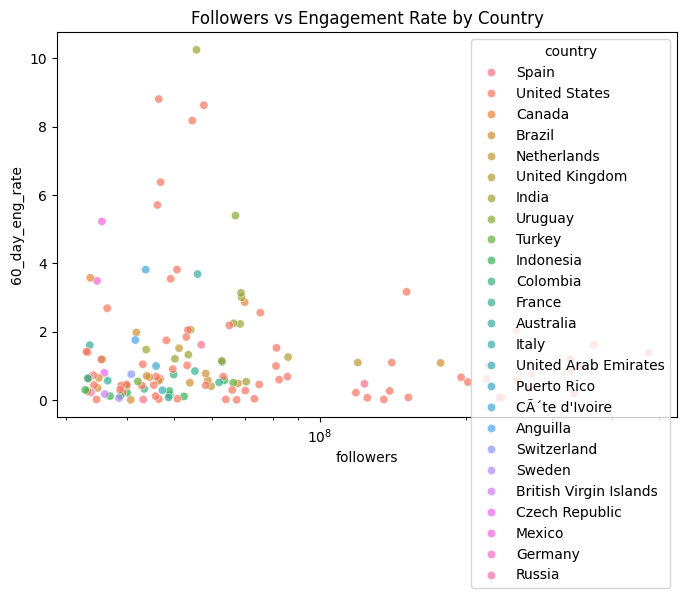

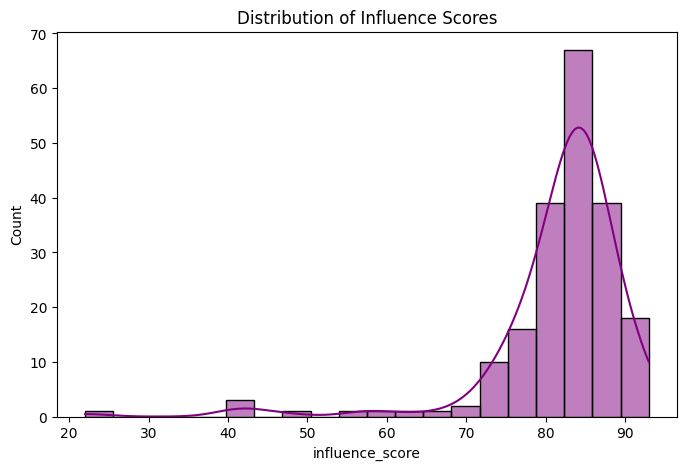

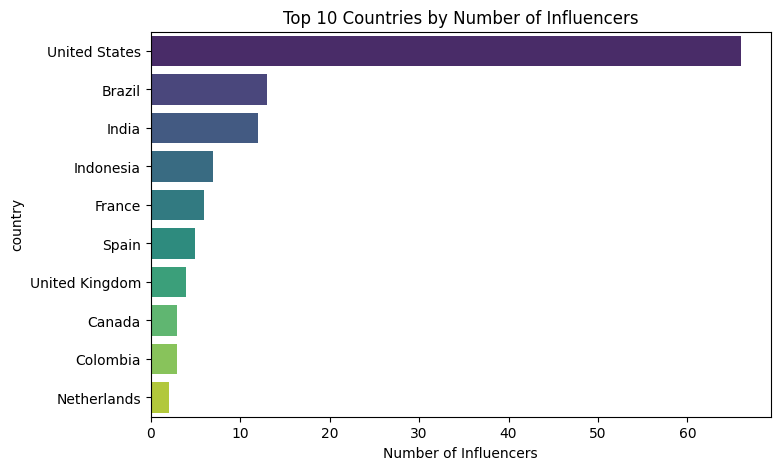


✅ Feature Engineering Completed!

📈 Regression Model Performance:
Mean Squared Error: 170.92930499999997
R² Score: -0.011000987020860498


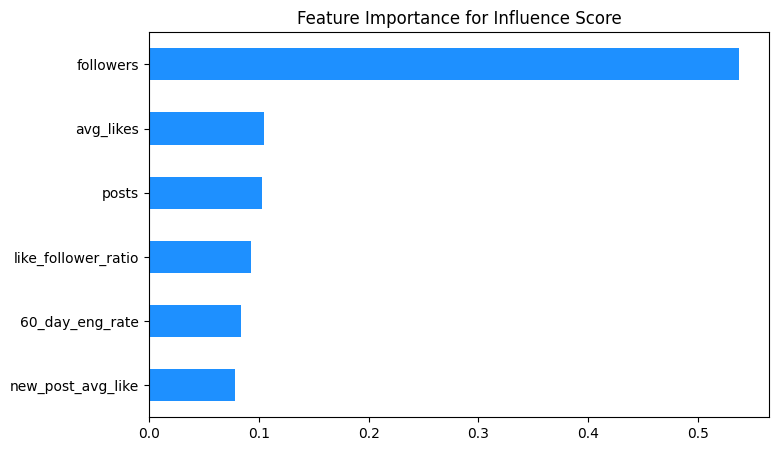


🤖 Classification Model Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       1.00      1.00      1.00        18
      Medium       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



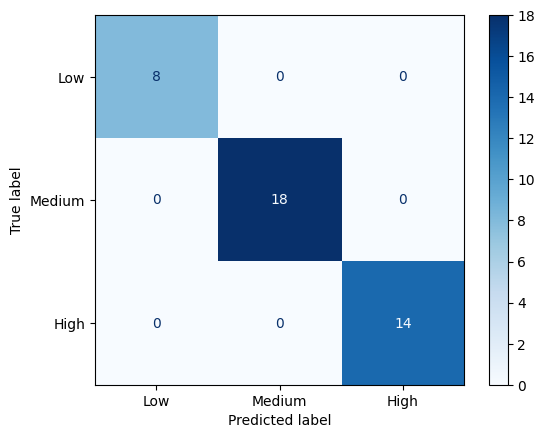


✅ Models Saved Successfully!


In [1]:



# =========================================
# 📊 TOP INSTAGRAM INFLUENCERS ANALYSIS PROJECT
# =========================================

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings("ignore")

# =========================================
# ✅ Step 2: Load Dataset
# =========================================
df = pd.read_csv("top_insta_influencers_data.csv")
print("✅ Dataset Loaded Successfully!")
print(df.head())

# =========================================
# ✅ Step 3: Clean Column Names
# =========================================
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\n📋 Columns after cleaning:\n", df.columns.tolist())

# =========================================
# ✅ Step 4: Data Cleaning
# =========================================
# Convert strings like '475.8m', '23k', etc. into numbers
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
cols_to_convert = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']

for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].replace(replace, regex=True).astype(float)

# Drop duplicates & handle missing
df.drop_duplicates(inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
print("\n✅ Data cleaned and numeric conversions done!")

# =========================================
# ✅ Step 5: Exploratory Data Analysis (EDA)
# =========================================
plt.figure(figsize=(8,5))
sns.scatterplot(x='followers', y='60_day_eng_rate', hue='country', data=df, alpha=0.7)
plt.title('Followers vs Engagement Rate by Country')
plt.xscale('log')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['influence_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Influence Scores')
plt.show()

top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Number of Influencers')
plt.show()

# =========================================
# ✅ Step 6: Feature Engineering
# =========================================
df['like_follower_ratio'] = df['total_likes'] / (df['followers'] + 1)
df['post_follower_ratio'] = df['posts'] / (df['followers'] + 1)
df['avg_likes_ratio'] = df['avg_likes'] / (df['followers'] + 1)
print("\n✅ Feature Engineering Completed!")

# =========================================
# ✅ Step 7: Regression Model (Predict Influence Score)
# =========================================
features = ['followers', 'posts', 'avg_likes', '60_day_eng_rate', 
            'new_post_avg_like', 'like_follower_ratio']
X = df[features]
y = df['influence_score']

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

print("\n📈 Regression Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

importance = pd.Series(regressor.feature_importances_, index=features).sort_values(ascending=True)
importance.plot(kind='barh', color='dodgerblue', figsize=(8,5), title="Feature Importance for Influence Score")
plt.show()

# =========================================
# ✅ Step 8: Classification Model (Engagement Category)
# =========================================
bins = [0, 1, 3, df['60_day_eng_rate'].max()]
labels = ['Low', 'Medium', 'High']
df['engagement_class'] = pd.cut(df['60_day_eng_rate'], bins=bins, labels=labels)

X_class = df[features]
y_class = df['engagement_class'].dropna()
X_class = X_class.loc[y_class.index]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_c_scaled, y_train_c)
y_pred_c = classifier.predict(X_test_c_scaled)

print("\n🤖 Classification Model Performance:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

ConfusionMatrixDisplay(confusion_matrix(y_test_c, y_pred_c), display_labels=labels).plot(cmap='Blues')
plt.show()

# =========================================
# ✅ Step 9: Save Models
# =========================================
joblib.dump(regressor, "influencer_regression_model.pkl")
joblib.dump(classifier, "engagement_classifier.pkl")
print("\n✅ Models Saved Successfully!")


✅ Dataset Loaded Successfully!
   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  

📋 Columns after cleaning:
 ['rank', 'channel_info', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'country

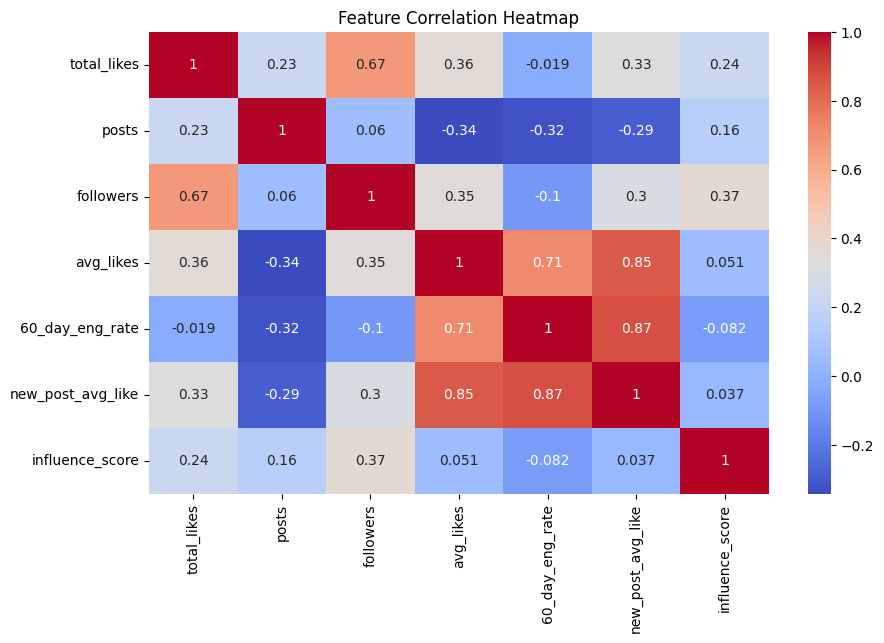

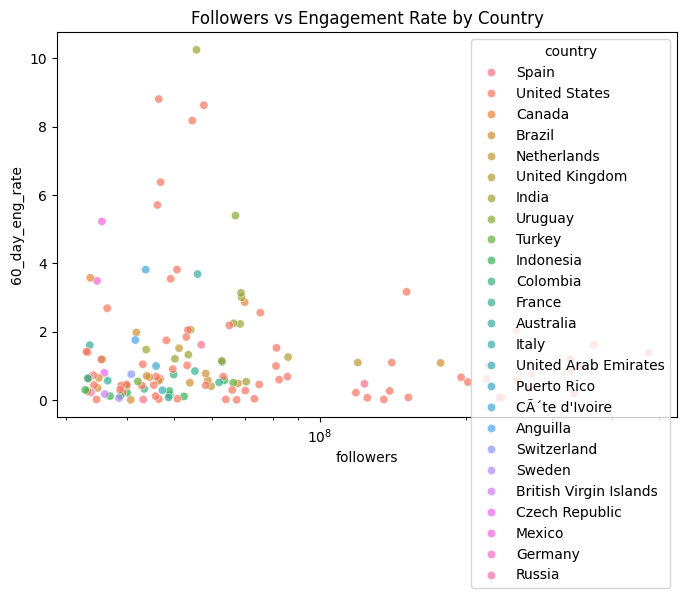

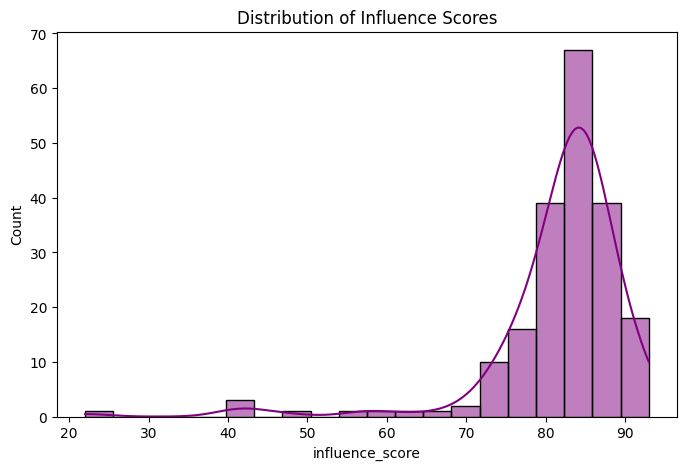

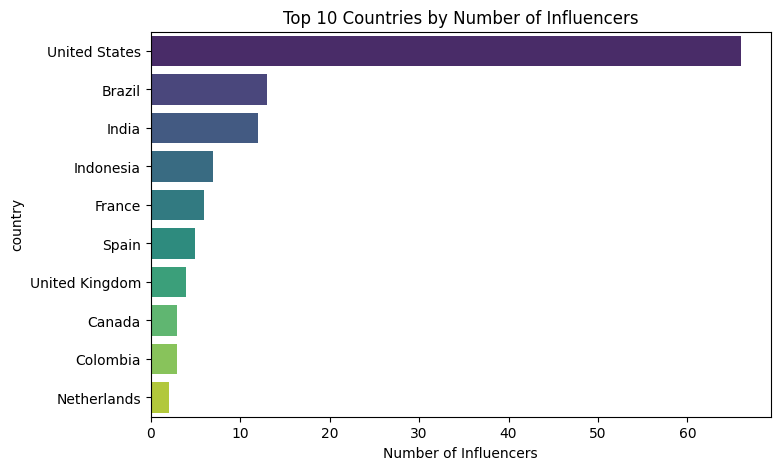


✅ Feature Engineering Completed!

📈 Regression Model Performance:
Mean Squared Error: 170.92930499999997
Mean Absolute Error: 5.8695
R² Score: -0.011000987020860498


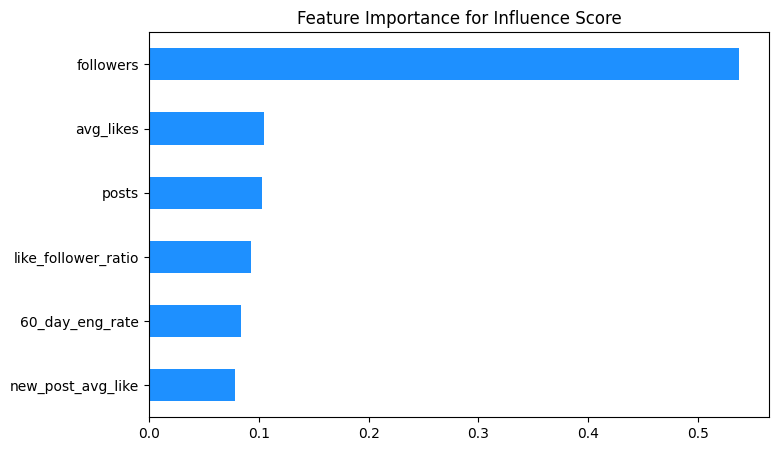


🤖 Classification Model Performance:
Accuracy: 0.975
              precision    recall  f1-score   support

        High      1.000     1.000     1.000        18
         Low      1.000     0.929     0.963        14
      Medium      0.889     1.000     0.941         8

    accuracy                          0.975        40
   macro avg      0.963     0.976     0.968        40
weighted avg      0.978     0.975     0.975        40



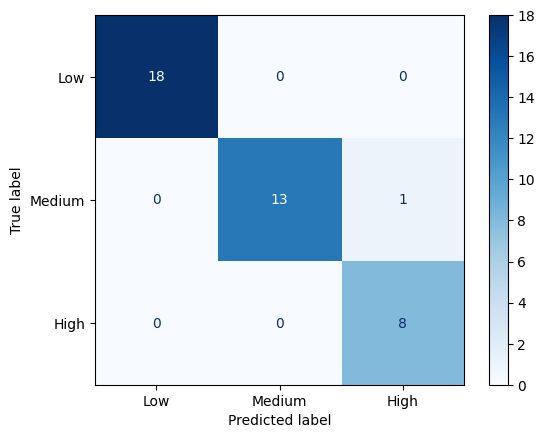


✅ Models Saved Successfully!


In [2]:
# =========================================
# 📊 TOP INSTAGRAM INFLUENCERS ANALYSIS PROJECT
# =========================================

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings("ignore")

# =========================================
# ✅ Step 2: Load Dataset
# =========================================
df = pd.read_csv("top_insta_influencers_data.csv")
print("✅ Dataset Loaded Successfully!")
print(df.head())

# =========================================
# ✅ Step 3: Clean Column Names
# =========================================
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\n📋 Columns after cleaning:\n", df.columns.tolist())

# =========================================
# ✅ Step 4: Data Cleaning
# =========================================
# Convert strings like '475.8m', '23k', etc. into numbers
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
cols_to_convert = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']

for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].replace(replace, regex=True).astype(float)

# Drop duplicates & handle missing
df.drop_duplicates(inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
print("\n✅ Data cleaned and numeric conversions done!")

# Check remaining missing values
print(df.isnull().sum())

# =========================================
# ✅ Step 5: Exploratory Data Analysis (EDA)
# =========================================
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[cols_to_convert + ['influence_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Followers vs Engagement Rate (log scale)
plt.figure(figsize=(8,5))
sns.scatterplot(x='followers', y='60_day_eng_rate', hue='country', data=df, alpha=0.7)
plt.xscale('log')
plt.title('Followers vs Engagement Rate by Country')
plt.show()

# Distribution of Influence Score
plt.figure(figsize=(8,5))
sns.histplot(df['influence_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Influence Scores')
plt.show()

# Top 10 Countries by Number of Influencers
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Number of Influencers')
plt.show()

# =========================================
# ✅ Step 6: Feature Engineering
# =========================================
df['like_follower_ratio'] = df['total_likes'] / (df['followers'] + 1)
df['post_follower_ratio'] = df['posts'] / (df['followers'] + 1)
df['avg_likes_ratio'] = df['avg_likes'] / (df['followers'] + 1)
df['eng_rate_like_ratio'] = df['60_day_eng_rate'] / (df['avg_likes'] + 1)
print("\n✅ Feature Engineering Completed!")

# =========================================
# ✅ Step 7: Regression Model (Predict Influence Score)
# =========================================
features = ['followers', 'posts', 'avg_likes', '60_day_eng_rate', 
            'new_post_avg_like', 'like_follower_ratio']

X = df[features]
y = df['influence_score']

# Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

# Regression Performance
print("\n📈 Regression Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Feature Importance
importance = pd.Series(regressor.feature_importances_, index=features).sort_values(ascending=True)
importance.plot(kind='barh', color='dodgerblue', figsize=(8,5), title="Feature Importance for Influence Score")
plt.show()

# =========================================
# ✅ Step 8: Classification Model (Engagement Category)
# =========================================
# Percentile-based engagement bins for balance
bins = [0, df['60_day_eng_rate'].quantile(0.33), df['60_day_eng_rate'].quantile(0.66), df['60_day_eng_rate'].max()]
labels = ['Low', 'Medium', 'High']
df['engagement_class'] = pd.cut(df['60_day_eng_rate'], bins=bins, labels=labels)

X_class = df[features]
y_class = df['engagement_class'].dropna()
X_class = X_class.loc[y_class.index]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_c_scaled, y_train_c)
y_pred_c = classifier.predict(X_test_c_scaled)

# Classification Performance
print("\n🤖 Classification Model Performance:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c, digits=3))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test_c, y_pred_c), display_labels=labels).plot(cmap='Blues')
plt.show()

# =========================================
# ✅ Step 9: Save Models
# =========================================
joblib.dump(regressor, "influencer_regression_model.pkl")
joblib.dump(classifier, "engagement_classifier.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Models Saved Successfully!")


<Figure size 1000x800 with 0 Axes>

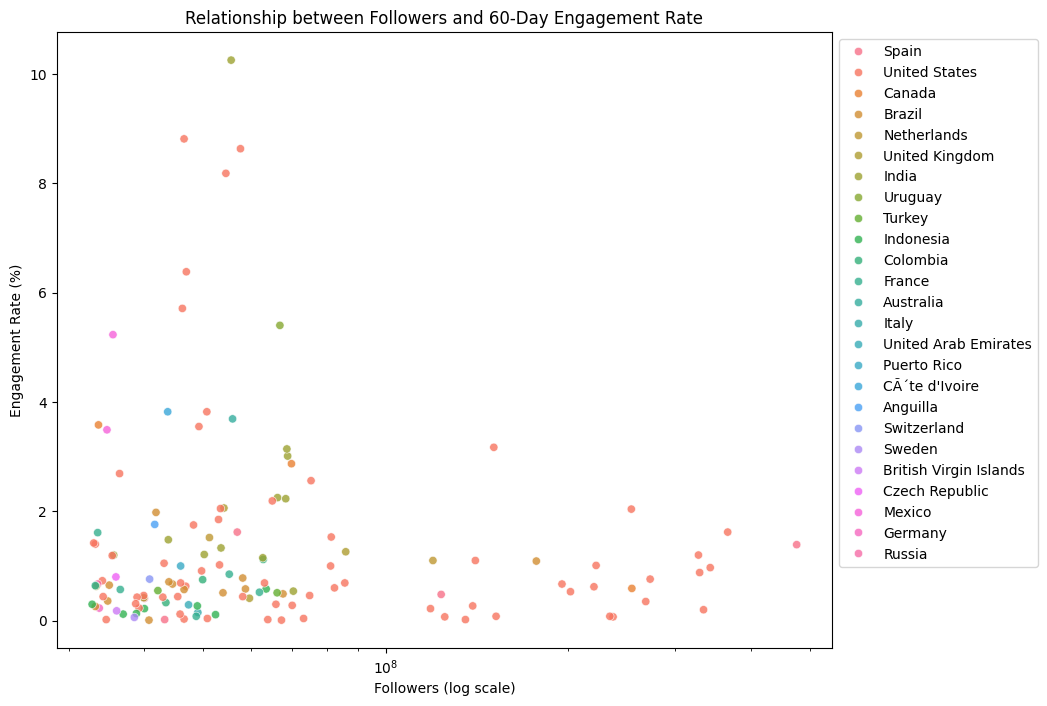

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
df = pd.read_csv("top_insta_influencers_data.csv")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("top_insta_influencers_data.csv")

# Clean followers, posts, likes, and engagement columns
def convert_to_number(x):
    if isinstance(x, str):
        x = x.replace(',', '').lower()
        if 'm' in x:
            return float(x.replace('m', '')) * 1e6
        elif 'k' in x:
            return float(x.replace('k', '')) * 1e3
        elif 'b' in x:
            return float(x.replace('b', '')) * 1e9
        elif '%' in x:
            return float(x.replace('%', ''))
        else:
            try:
                return float(x)
            except:
                return None
    return x

# Apply the conversion to numeric columns
for col in ['followers', 'posts', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']:
    df[col] = df[col].apply(convert_to_number)

# Drop NaN values (if any)
df.dropna(subset=['followers', '60_day_eng_rate'], inplace=True)

# ✅ Plot properly
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='followers', 
    y='60_day_eng_rate', 
    hue='country', 
    data=df, 
    alpha=0.8
)

plt.xscale('log')  # log scale for large follower range
plt.title('Relationship between Followers and 60-Day Engagement Rate')
plt.xlabel('Followers (log scale)')
plt.ylabel('Engagement Rate (%)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


